<center>
    <h1 style="font-weight: bold;">
    Binary Classification from Tabular Data</h1>
</center>

## **Deskripsi**

Menggunakan clustering sebagai salah satu metode feature engineering

## **Library Import**

In [153]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Preprocessing
from class_reg_preprocessing import (
    FeatureOutliersHandling,
    FeatureImputer,
    FeatureResampling,
    FeatureLabelEncoder,
    FeatureDiscretizer,
    FeatureRareCategoriesGrouping,
    FeaturePolynomialAdder,
    FeaturePowerTransformer,
    FeatureGroupingNumeric,
    FeatureDimensionReducer,
    FeatureEncoder,
    FeatureScaler,
)

import warnings
warnings.filterwarnings('ignore')

## **Data Loading**

In [154]:
data_path = './data'

**Train**

In [155]:
# TODO: define initial dataframes
initial_df = pd.read_csv(f'{data_path}/EV_data.csv')
# -----------------------------------

initial_df

,read_date,interval_1,interval_2,interval_3,interval_4,interval_5,interval_6,interval_7,interval_8,interval_9,...,interval_41,interval_42,interval_43,interval_44,interval_45,interval_46,interval_47,interval_48,id,label
0,3/1/2021,0.0625,0.0500,0.0687,0.0750,0.0687,0.0500,0.0625,0.0687,0.0687,...,0.0812,0.0687,0.0687,0.0562,0.0562,0.0687,0.0687,0.0625,1,1
1,3/2/2021,0.0625,0.0500,0.0687,0.0625,0.0625,0.0562,0.0562,0.0625,0.0687,...,0.1375,0.0750,0.0687,0.0625,0.0625,0.0562,0.0625,0.0625,1,1
2,3/3/2021,0.0625,0.0687,0.0500,0.0562,0.0687,0.0625,0.0625,0.0625,0.0500,...,0.1875,0.1062,0.0750,0.0687,0.0687,0.0625,0.0562,0.0562,1,1
3,3/4/2021,0.0625,0.0625,0.0687,0.0500,0.0562,0.0625,0.0625,0.0625,0.0562,...,0.1125,0.0875,0.0687,0.0625,0.0562,0.0625,0.0625,0.0687,1,1
4,3/5/2021,0.0625,0.0625,0.0500,0.0625,0.0687,0.0625,0.0687,0.0562,0.0500,...,0.0812,0.0562,0.0687,0.0625,0.0625,0.0625,0.0562,0.0500,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4043,3/31/2021 0:00,0.2125,0.2000,0.1625,0.1750,0.2375,0.2125,0.1875,0.1750,0.2000,...,0.3375,0.3875,0.3375,0.3875,0.2500,0.5125,0.4750,0.2000,57,0
4044,4/1/2021 0:00,0.1625,0.1625,0.1500,0.1500,0.2000,0.1750,0.1625,0.1625,0.1500,...,0.2375,0.2000,0.2125,0.2000,0.2000,0.2875,0.1875,0.2250,57,0
4045,4/2/2021 0:00,0.1625,0.2000,0.2125,0.1625,0.1625,0.1375,0.1500,0.1250,0.1875,...,0.2500,0.2750,0.3750,0.3375,0.3250,0.2625,0.3000,0.3500,57,0
4046,4/3/2021 0:00,0.2250,0.2250,0.1625,0.1750,0.1750,0.1500,0.1500,0.2125,0.1625,...,0.3375,0.4000,0.3500,0.2625,0.4000,0.3375,0.8375,0.6625,57,0


**Test**

In [156]:
# # TODO: define test dataframe
# test_features_df = pd.read_csv(f'{data_path}/test_features.csv')

# submisssion_ids = test_features_df['ID']

# test_features_df = test_features_df.drop(columns=['ID'])
# # -------------------------------------

# test_features_df = test_features_df.reindex(sorted(test_features_df.columns), axis=1)

# test_features_df

**Define Target and Features**

In [157]:
# TODO: define which columns are target labels
label = 'label'
# -----------------------------------
# TODO: define which columns are categorical and which are numerical features
categorical_features = ['id']

# get all columns with float64 and int64 data types
numerical_features = initial_df.select_dtypes(include=['float64']).columns
# -----------------------------------


## **Data Preparation**

### **Drop Unnecessary Columns [TENTATIVE]**

In [158]:
# TODO: define columns to drop
columns_to_drop = ['label', 'read_date']
# -----------------------------------

categorical_features = [col for col in categorical_features if col not in columns_to_drop]
numerical_features = [col for col in numerical_features if col not in columns_to_drop]

### **Drop Duplicates**

In [159]:
print('Row count for initial data before removing duplicates:', len(initial_df))
initial_df.drop_duplicates(inplace=True)
print('Row count for initial data after removing duplicates:', len(initial_df))
initial_df.reset_index(drop=True, inplace=True) # Reset the index after dropping duplicates

Row count for initial data before removing duplicates: 4048
Row count for initial data after removing duplicates: 4048


In [160]:
initial_df = initial_df.drop(columns=columns_to_drop)
# test_features_df = test_features_df.drop(columns=columns_to_drop)

#### **Check Similarity Columns between Train and Test**

In [161]:
def is_same_cols(df1: pd.DataFrame, df2: pd.DataFrame, label: str):
    """
    Function to check if two DataFrames have the same columns, excluding the label column if it exists.
    
    Parameters:
    - df1: First DataFrame
    - df2: Second DataFrame
    - label: The name of the label column to exclude from the comparison (default is 'label').
    
    Returns:
    - Boolean value indicating whether the columns are the same, excluding the label column
    """
    # Exclude the label column if it exists in either DataFrame
    df1_cols = df1.columns.drop(label) if label in df1.columns else df1.columns
    df2_cols = df2.columns.drop(label) if label in df2.columns else df2.columns

    # Compare the remaining columns
    return df1_cols.equals(df2_cols)

In [162]:
# print('Initial and test features have the same columns:', is_same_cols(initial_df, test_features_df, label))

### **Grouping by ID**

In [163]:
grouped_df = initial_df.groupby(['id']).mean()

In [164]:
grouped_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 88 entries, 1 to 88
Data columns (total 48 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   interval_1   88 non-null     float64
 1   interval_2   88 non-null     float64
 2   interval_3   88 non-null     float64
 3   interval_4   88 non-null     float64
 4   interval_5   88 non-null     float64
 5   interval_6   88 non-null     float64
 6   interval_7   88 non-null     float64
 7   interval_8   88 non-null     float64
 8   interval_9   88 non-null     float64
 9   interval_10  88 non-null     float64
 10  interval_11  88 non-null     float64
 11  interval_12  88 non-null     float64
 12  interval_13  88 non-null     float64
 13  interval_14  88 non-null     float64
 14  interval_15  88 non-null     float64
 15  interval_16  88 non-null     float64
 16  interval_17  88 non-null     float64
 17  interval_18  88 non-null     float64
 18  interval_19  88 non-null     float64
 19  interval_20  88

### **Clustering for feature engineering**

In [165]:
import numpy as np
import matplotlib.pyplot as plt

# Fungsi untuk menghitung jarak euclidean
def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1-x2)**2))

# Kelas KMeans untuk melakukan clustering
class KMeans:

    def __init__(self, K=3, max_iters=100, random_state=42):
        self.K = K
        self.max_iters = max_iters
        self.random_state = random_state

        # List untuk menyimpan indeks sampel pada tiap cluster
        self.clusters = [[] for _ in range(self.K)]

        # List untuk menyimpan centroid (mean) dari tiap cluster
        self.centroids = []


    def predict(self, X):
        self.X = X
        self.n_samples, self.n_features = X.shape
        
        if self.random_state is not None:
            np.random.seed(self.random_state)

        # init centroid secara acak dari sampel dalam dataset
        random_sample_idxs = np.random.choice(self.n_samples, self.K, replace=False)
        self.centroids = [self.X[idx] for idx in random_sample_idxs]

        # optimize clusters
        for _ in range(self.max_iters):
            # assign samples ke centroid terdekat
            self.clusters = self._create_clusters(self.centroids)


            # hitung centroid baru berdasarkan cluster
            centroids_old = self.centroids
            self.centroids = self._get_centroids(self.clusters)

            # Periksa konvergensi (apakah centroid tidak berubah)
            if self._is_converged(centroids_old, self.centroids):
                break

        # Klasifikasikan sampel sesuai dengan cluster
        return self._get_cluster_labels(self.clusters)

    # Mendapatkan label cluster untuk tiap sampel berdasarkan assignment cluster.
    def _get_cluster_labels(self, clusters):
        labels = np.empty(self.n_samples)
        for cluster_idx, cluster in enumerate(clusters):
            for sample_idx in cluster:
                labels[sample_idx] = cluster_idx

        return labels

    # Membuat cluster dengan mengassign sampel ke centroid terdekat.
    def _create_clusters(self, centroids):
        clusters = [[] for _ in range(self.K)]
        for idx, sample in enumerate(self.X):
            centroid_idx = self._closest_centroid(sample, centroids)
            clusters[centroid_idx].append(idx)
        return clusters

    # Menentukan centroid terdekat untuk sebuah sampel.
    def _closest_centroid(self, sample, centroids):
        distances = [euclidean_distance(sample, point) for point in centroids]
        closest_idx = np.argmin(distances)
        return closest_idx

    # Mendapatkan centroid baru berdasarkan rata-rata nilai sampel dalam cluster.
    def _get_centroids(self, clusters):
        centroids = np.zeros((self.K, self.n_features))
        for cluster_idx, cluster in enumerate(clusters):
            cluster_mean = np.mean(self.X[cluster], axis=0)
            centroids[cluster_idx] = cluster_mean
        return centroids
    # Periksa konvergensi dengan membandingkan centroid baru dan centroid lama.
    def _is_converged(self, centroids_old, centroids):
        distances = [euclidean_distance(centroids_old[i], centroids[i]) for i in range(self.K)]
        return sum(distances) == 0

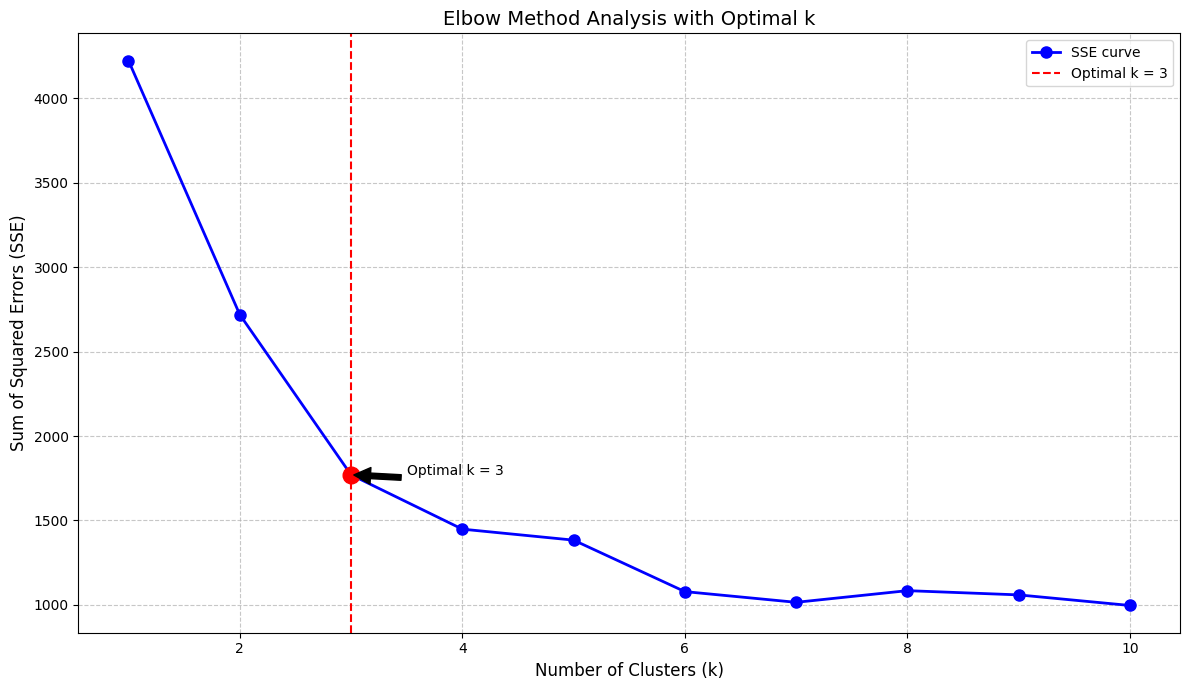

In [190]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from scipy.spatial.distance import cdist

def find_optimal_k(sse_values):
    """
    Find the optimal k using the elbow method by identifying the point of maximum curvature
    """
    # Calculate the differences and rate of change
    differences = np.diff(sse_values)
    differences_rate = np.diff(differences)
    
    # Find the elbow point (point of maximum curvature)
    elbow_index = np.argmax(np.abs(differences_rate)) + 2
    return elbow_index

def elbow_method(df, max_k=10):
    """
    Perform elbow method analysis and visualize results with optimal k highlighted
    """
    # Standardize the features
    scaler = StandardScaler()
    scaled_features = scaler.fit_transform(df)
    
    # Calculate SSE for different values of k
    sse = []
    K = range(1, max_k+1)
    
    for k in K:
        kmeans = KMeans(K=k, max_iters=100)
        labels = kmeans.predict(scaled_features)
        
        # Calculate SSE
        current_sse = 0
        for i, cluster in enumerate(kmeans.clusters):
            if len(cluster) > 0:  # Check if cluster is not empty
                cluster_points = scaled_features[cluster]
                centroid = kmeans.centroids[i]
                current_sse += np.sum((cluster_points - centroid) ** 2)
        
        sse.append(current_sse)
    
    # Find optimal k
    optimal_k = find_optimal_k(sse)
    
    # Create the visualization
    plt.figure(figsize=(12, 7))
    
    # Plot the elbow curve
    plt.plot(K, sse, 'bo-', linewidth=2, markersize=8, label='SSE curve')
    
    # Add vertical line at optimal k
    plt.axvline(x=optimal_k, color='red', linestyle='--', 
                label=f'Optimal k = {optimal_k}')
    
    # Highlight the optimal point
    plt.plot(optimal_k, sse[optimal_k-1], 'ro', markersize=12)
    
    # Customize the plot
    plt.xlabel('Number of Clusters (k)', fontsize=12)
    plt.ylabel('Sum of Squared Errors (SSE)', fontsize=12)
    plt.title('Elbow Method Analysis with Optimal k', fontsize=14)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.legend(fontsize=10)
    
    # Add text annotation for optimal k
    plt.annotate(f'Optimal k = {optimal_k}',
                xy=(optimal_k, sse[optimal_k-1]),
                xytext=(optimal_k+0.5, sse[optimal_k-1]),
                fontsize=10,
                arrowprops=dict(facecolor='black', shrink=0.05))
    
    plt.tight_layout()
    plt.show()
    
    return sse, optimal_k

def analyze_clusters(df, optimal_k):
    """
    Perform clustering with the optimal k and return labeled data
    """
    scaler = StandardScaler()
    scaled_features = scaler.fit_transform(df)
    
    kmeans = KMeans(K=optimal_k, max_iters=100)
    labels = kmeans.predict(scaled_features)
    
    return labels, kmeans.centroids

# Usage example:
sse_values, optimal_k = elbow_method(grouped_df, max_k=10)
labels, centroids = analyze_clusters(grouped_df, optimal_k)

In [ ]:
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
def apply_kmeans_clustering(df, n_clusters):
    """
    Apply KMeans clustering to the DataFrame and return the original data
    with cluster assignments added as a new column
    """
    # Create a copy of the DataFrame
    df_copy = df.copy()
    
    train_df, test_df = train_test_split(df_copy, test_size=0.2, random_state=42)
    
    # Standardize the features
    scaler = MinMaxScaler()
    scaled_train = scaler.fit_transform(train_df)
    # Transform test data using the same scaler
    scaled_test = scaler.transform(test_df)
        
    # Apply PCA
    pca = PCA(n_components=4)
    pca_train = pca.fit_transform(scaled_train)
    # Transform test data using the same PCA
    pca_test = pca.transform(scaled_test)
    
    
    # Fit KMeans on training data
    kmeans = KMeans(K=n_clusters, max_iters=100)
    train_labels = kmeans.predict(pca_train)
    # Predict clusters for test data
    test_labels = kmeans.predict(pca_test)
    
    # Add cluster assignments to the DataFrames
    train_df_with_clusters = train_df.copy()
    test_df_with_clusters = test_df.copy()
    train_df_with_clusters['cluster'] = train_labels
    test_df_with_clusters['cluster'] = test_labels
    
    
    # Transform centroids back to original space
    pca_centroids = kmeans.centroids
    original_space_centroids = pca.inverse_transform(pca_centroids)
    centroid_values = scaler.inverse_transform(original_space_centroids)
    
    # Create centroids DataFrame
    centroids_df = pd.DataFrame(
        centroid_values,
        columns=df.columns,
        index=[f'Cluster_{i}' for i in range(n_clusters)]
    )
    combined_df = pd.concat([train_df_with_clusters, test_df_with_clusters])
    
    return combined_df, centroids_df, kmeans

In [168]:
n_clusters = 3  # Replace with your optimal number from the elbow method
df_clustered, centroids, model = apply_kmeans_clustering(grouped_df, n_clusters)

In [169]:
df_clustered

,interval_1,interval_2,interval_3,interval_4,interval_5,interval_6,interval_7,interval_8,interval_9,interval_10,...,interval_40,interval_41,interval_42,interval_43,interval_44,interval_45,interval_46,interval_47,interval_48,cluster
id,,,,,,,,,,,,,,,,,,,,,
56,0.124630,0.125696,0.116891,0.124696,0.125565,0.110500,0.119391,0.123609,0.110196,0.120196,...,0.410435,0.318283,0.293130,0.206870,0.162522,0.147196,0.131304,0.133109,0.124978,1.0
74,0.063957,0.049174,0.060130,0.067565,0.067696,0.089239,0.060696,0.072326,0.072152,0.159761,...,0.185935,0.179630,0.337022,0.251457,0.228152,0.148043,0.075500,0.068196,0.106196,2.0
12,0.012620,0.010428,0.009224,0.009072,0.006230,0.006904,0.006363,0.006633,0.005822,0.006363,...,0.002428,0.002696,0.002965,0.002426,0.028230,0.078791,0.094259,0.087893,0.093580,2.0
31,0.191552,0.185300,0.161524,0.106224,0.157315,0.102011,0.103372,0.101739,0.104322,0.101607,...,0.206772,0.234491,0.213291,0.207861,0.197667,0.190598,0.230002,0.233672,0.211796,2.0
41,0.254076,0.261141,0.269837,0.291576,0.295652,0.263043,0.245380,0.243750,0.211957,0.188043,...,0.075272,0.077989,0.111957,0.146196,0.135326,0.152989,0.162772,0.170109,0.203804,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81,0.277826,0.288150,0.283261,0.246717,0.208543,0.184076,0.171576,0.152420,0.157180,0.148889,...,0.345357,0.278370,0.230272,0.237615,0.257989,0.224293,0.232457,0.261528,0.260439,2.0
85,0.065565,0.074696,0.072761,0.076957,0.063130,0.072152,0.066196,0.074217,0.061957,0.061348,...,0.129065,0.127674,0.116826,0.177370,0.149761,0.097848,0.079739,0.070326,0.066717,0.0
65,0.290478,0.273130,0.215543,0.188239,0.180413,0.153261,0.141130,0.138435,0.129478,0.133239,...,0.609543,0.399283,0.400891,0.449239,0.414000,0.310130,0.373196,0.373630,0.273391,2.0


In [170]:
#Save clustered data to csv
df_clustered.to_csv(f'{data_path}/clustered_data.csv')

In [171]:
df1 = pd.read_csv(f'{data_path}/EV_data.csv')
df2 = pd.read_csv(f'{data_path}/clustered_data.csv')

merged_df = df1.merge(
    df2[['id', 'cluster']], 
    on='id', 
    how='left'
)

In [172]:
merged_df.to_csv(f'{data_path}/merged_data.csv')

#### Analsis hasil cluster

In [187]:
import seaborn as sns
def plot_cluster_distribution(df, title="Distribution of Clusters"):
    plt.figure(figsize=(10, 6))
    # Get cluster counts
    cluster_counts = df['cluster'].value_counts().sort_index()
    
    # Create bar plot with explicit positions
    bars = plt.bar(
        range(len(cluster_counts)),
        cluster_counts,
        width=0.6,  # Make bars thinner
        color='steelblue'
    )
    
    # Customize the plot
    plt.title(title)
    plt.xlabel('Cluster')
    plt.ylabel('Count')
    
    # Set x-axis ticks and labels
    plt.xticks(range(len(cluster_counts)), ['0', '1', '2'])
    
    # Add count labels on top of each bar
    for bar in bars:
        height = bar.get_height()
        plt.text(
            bar.get_x() + bar.get_width()/2,
            height,
            f'{int(height)}',
            ha='center',
            va='bottom'
        )
    
    # Add grid
    plt.grid(True, axis='y', linestyle='--', alpha=0.3)
    
    # Set y-axis to start at 0
    plt.ylim(0, max(cluster_counts) * 1.1)
    
    # Add some padding to x-axis
    plt.xlim(-0.5, len(cluster_counts) - 0.5)
    
    plt.show()

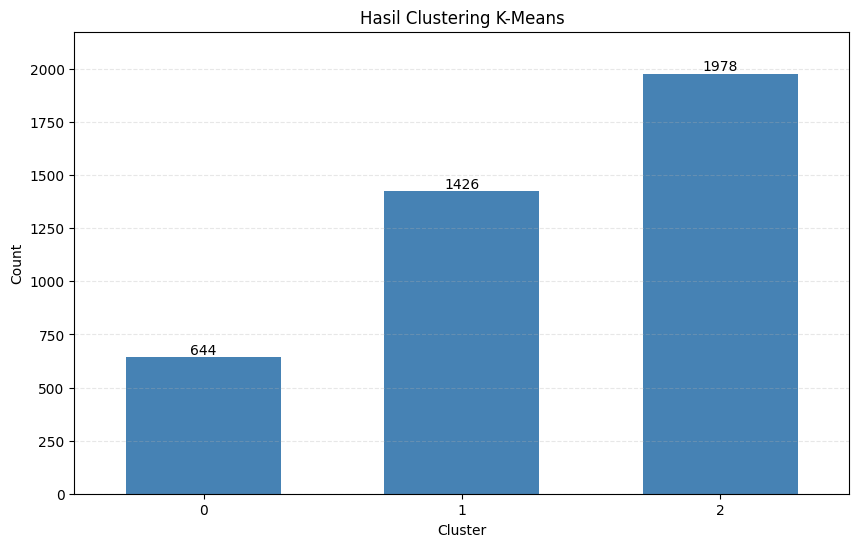

In [189]:
plot_cluster_distribution(merged_df, title="Hasil Clustering K-Means")

In [184]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def analyze_cluster_characteristics(df, feature_columns, cluster_col='cluster'):
    # Calculate summary statistics for each cluster
    cluster_stats = df.groupby(cluster_col)[feature_columns].agg([
        'mean',
        'median',
        'std',
        'min',
        'max'
    ]).round(2)
    
    # Calculate size of each cluster
    cluster_sizes = df[cluster_col].value_counts().sort_index()
    cluster_percentages = (cluster_sizes / len(df) * 100).round(2)
    
    print("=== Cluster Sizes ===")
    for cluster in cluster_sizes.index:
        print(f"Cluster {cluster}: {cluster_sizes[cluster]} samples ({cluster_percentages[cluster]}%)")
    print("\n=== Cluster Characteristics ===")
    
    return cluster_stats

def plot_feature_distributions(df, feature_columns, cluster_col='cluster'):
    n_features = len(feature_columns)
    fig, axes = plt.subplots(n_features, 1, figsize=(12, 5*n_features))
    
    if n_features == 1:
        axes = [axes]
    
    for ax, feature in zip(axes, feature_columns):
        sns.boxplot(data=df, x=cluster_col, y=feature, ax=ax)
        ax.set_title(f'Distribution of {feature} across clusters')
        ax.grid(True, linestyle='--', alpha=0.7)
    
    plt.tight_layout()
    plt.show()

def plot_feature_importance(df, feature_columns, cluster_col='cluster'):
    # Calculate mean values for each feature in each cluster
    cluster_means = df.groupby(cluster_col)[feature_columns].mean()
    
    # Calculate global means
    global_means = df[feature_columns].mean()
    
    # Calculate relative differences from global mean
    relative_importance = (cluster_means - global_means) / global_means * 100
    
    plt.figure(figsize=(24, 16))
    sns.heatmap(relative_importance, 
                annot=True, 
                fmt='.1f', 
                cmap='RdYlBu_r',
                center=0,
                cbar_kws={'label': 'Relative difference from global mean (%)'})
    plt.title('Feature Importance by Cluster')
    plt.ylabel('Cluster')
    plt.xlabel('Features')
    plt.tight_layout()
    plt.show()

def get_cluster_profiles(df, feature_columns, cluster_col='cluster', n_top_features=3):
    cluster_means = df.groupby(cluster_col)[feature_columns].mean()
    global_means = df[feature_columns].mean()
    relative_diff = (cluster_means - global_means) / global_means * 100
    
    profiles = {}
    for cluster in df[cluster_col].unique():
        # Get top distinguishing features
        cluster_diff = relative_diff.loc[cluster].sort_values(ascending=False)
        top_high = cluster_diff.head(n_top_features)
        top_low = cluster_diff.tail(n_top_features)
        
        profile = f"Cluster {cluster} Profile:\n"
        profile += f"Size: {len(df[df[cluster_col] == cluster])} samples\n"
        profile += "Distinguished by:\n"
        
        # Add high features
        profile += "Highest by consumption:\n"
        for feat, diff in top_high.items():
            profile += f"- {feat}: {diff:.1f}%\n"
        
        # Add low features
        profile += "\nLowest by consumption:\n"
        for feat, diff in top_low.items():
            profile += f"- {feat}: {diff:.1f}%\n"
            
        profiles[cluster] = profile
    
    return profiles

=== Cluster Sizes ===
Cluster 0.0: 644 samples (15.91%)
Cluster 1.0: 1426 samples (35.23%)
Cluster 2.0: 1978 samples (48.86%)

=== Cluster Characteristics ===

Statistik detail per cluster:
        interval_1                         interval_2                    \
              mean median   std  min   max       mean median   std  min   
cluster                                                                   
0.0           0.70   0.14  1.22  0.0  8.32       0.63   0.14  1.13  0.0   
1.0           0.36   0.20  0.58  0.0  8.06       0.34   0.19  0.58  0.0   
2.0           0.22   0.10  0.46  0.0  5.68       0.21   0.10  0.43  0.0   

                ... interval_47                          interval_48         \
           max  ...        mean median   std  min    max        mean median   
cluster         ...                                                           
0.0       8.31  ...        0.75   0.16  1.27  0.0   8.36        0.75   0.15   
1.0      12.71  ...        0.42   0.22  0.7

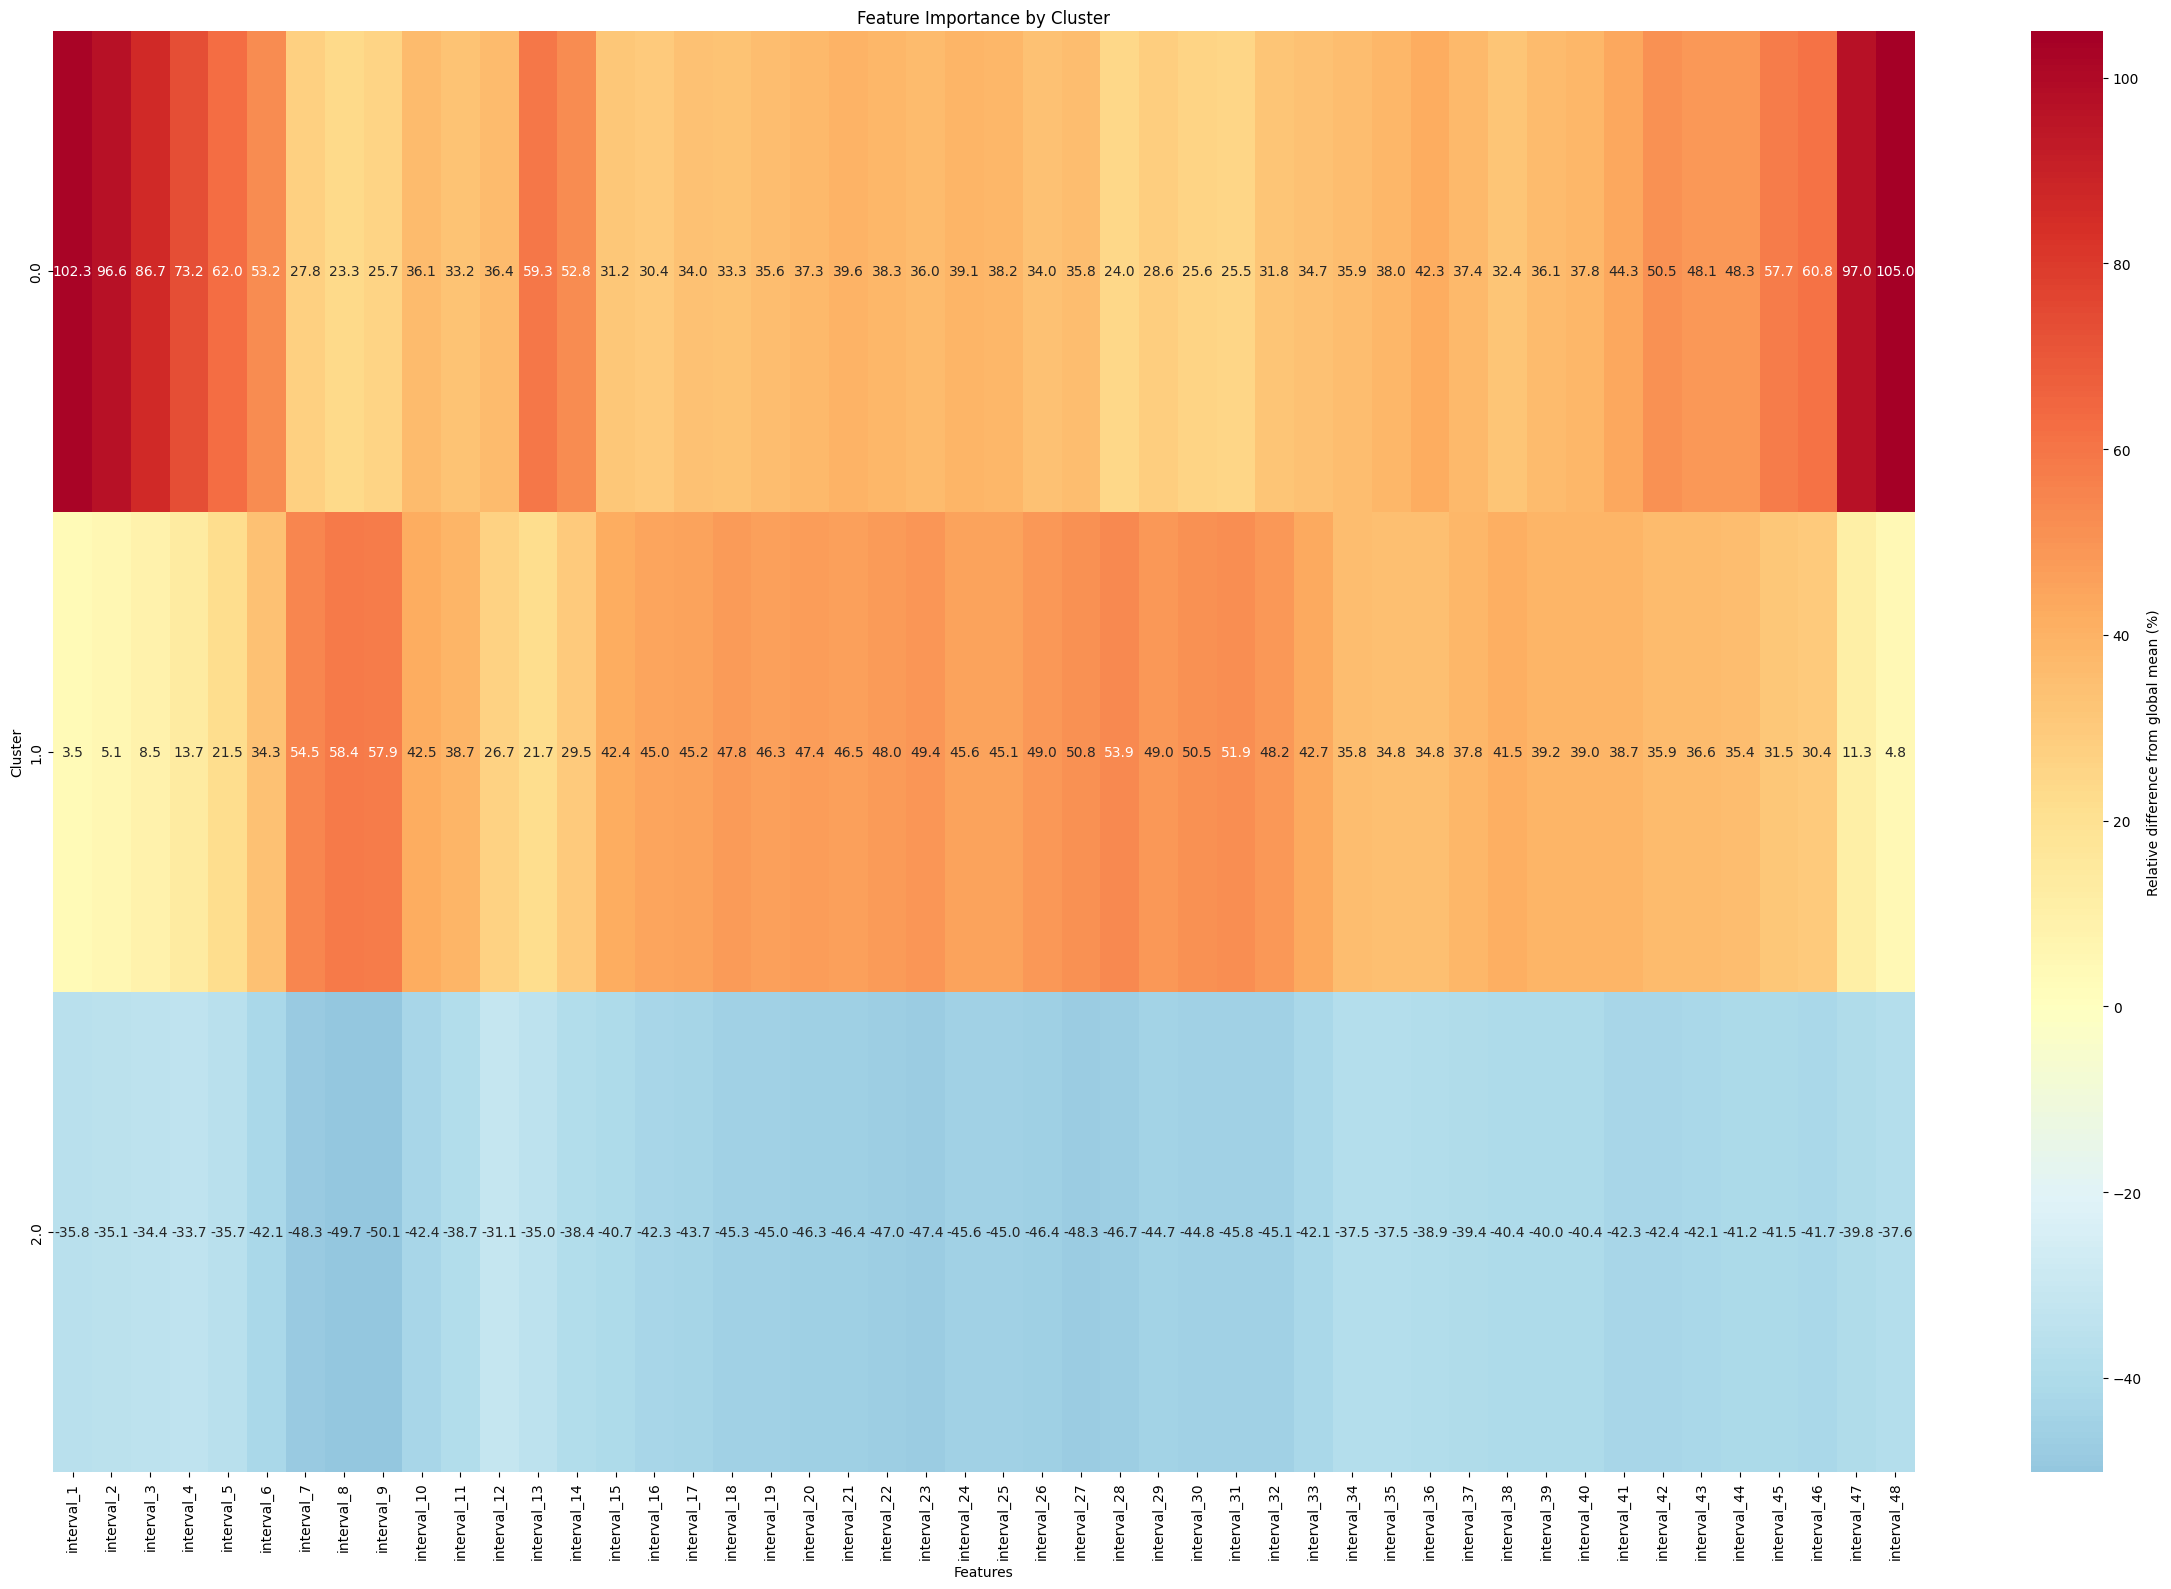


Cluster 0.0 Profile:
Size: 644 samples
Distinguished by:
Highest by consumption:
- interval_48: 105.0%
- interval_1: 102.3%
- interval_47: 97.0%

Lowest by consumption:
- interval_31: 25.5%
- interval_28: 24.0%
- interval_8: 23.3%


Cluster 2.0 Profile:
Size: 1978 samples
Distinguished by:
Highest by consumption:
- interval_12: -31.1%
- interval_4: -33.7%
- interval_3: -34.4%

Lowest by consumption:
- interval_7: -48.3%
- interval_8: -49.7%
- interval_9: -50.1%


Cluster 1.0 Profile:
Size: 1426 samples
Distinguished by:
Highest by consumption:
- interval_8: 58.4%
- interval_9: 57.9%
- interval_7: 54.5%

Lowest by consumption:
- interval_2: 5.1%
- interval_48: 4.8%
- interval_1: 3.5%



In [186]:
# Asumsikan kita memiliki feature_columns yang berisi nama-nama kolom fitur
feature_columns = [col for col in merged_df.columns if col not in ['cluster', 'read_date', 'id', 'label']]

# 1. Analisis statistik dasar
cluster_stats = analyze_cluster_characteristics(merged_df, feature_columns)
print("\nStatistik detail per cluster:")
print(cluster_stats)

# # 2. Visualisasi distribusi fitur
# plot_feature_distributions(merged_df, feature_columns)

# 3. Visualisasi pentingnya fitur
plot_feature_importance(merged_df, feature_columns)

# 4. Dapatkan profil detail setiap cluster
cluster_profiles = get_cluster_profiles(merged_df, feature_columns)
for cluster, profile in cluster_profiles.items():
    print("\n" + profile)

## Modelling

### Load data merged_data

In [177]:
merged_df

,read_date,interval_1,interval_2,interval_3,interval_4,interval_5,interval_6,interval_7,interval_8,interval_9,...,interval_42,interval_43,interval_44,interval_45,interval_46,interval_47,interval_48,id,label,cluster
0,3/1/2021,0.0625,0.0500,0.0687,0.0750,0.0687,0.0500,0.0625,0.0687,0.0687,...,0.0687,0.0687,0.0562,0.0562,0.0687,0.0687,0.0625,1,1,0.0
1,3/2/2021,0.0625,0.0500,0.0687,0.0625,0.0625,0.0562,0.0562,0.0625,0.0687,...,0.0750,0.0687,0.0625,0.0625,0.0562,0.0625,0.0625,1,1,0.0
2,3/3/2021,0.0625,0.0687,0.0500,0.0562,0.0687,0.0625,0.0625,0.0625,0.0500,...,0.1062,0.0750,0.0687,0.0687,0.0625,0.0562,0.0562,1,1,0.0
3,3/4/2021,0.0625,0.0625,0.0687,0.0500,0.0562,0.0625,0.0625,0.0625,0.0562,...,0.0875,0.0687,0.0625,0.0562,0.0625,0.0625,0.0687,1,1,0.0
4,3/5/2021,0.0625,0.0625,0.0500,0.0625,0.0687,0.0625,0.0687,0.0562,0.0500,...,0.0562,0.0687,0.0625,0.0625,0.0625,0.0562,0.0500,1,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4043,3/31/2021 0:00,0.2125,0.2000,0.1625,0.1750,0.2375,0.2125,0.1875,0.1750,0.2000,...,0.3875,0.3375,0.3875,0.2500,0.5125,0.4750,0.2000,57,0,1.0
4044,4/1/2021 0:00,0.1625,0.1625,0.1500,0.1500,0.2000,0.1750,0.1625,0.1625,0.1500,...,0.2000,0.2125,0.2000,0.2000,0.2875,0.1875,0.2250,57,0,1.0
4045,4/2/2021 0:00,0.1625,0.2000,0.2125,0.1625,0.1625,0.1375,0.1500,0.1250,0.1875,...,0.2750,0.3750,0.3375,0.3250,0.2625,0.3000,0.3500,57,0,1.0
4046,4/3/2021 0:00,0.2250,0.2250,0.1625,0.1750,0.1750,0.1500,0.1500,0.2125,0.1625,...,0.4000,0.3500,0.2625,0.4000,0.3375,0.8375,0.6625,57,0,1.0


### Train test split

In [178]:
from sklearn.model_selection import train_test_split

# drop read date
merged_df = merged_df.drop(columns=['read_date'])

X = merged_df.drop(columns=[label])
y = merged_df[label]

# X_test = test_features_df
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("Jumlah data:", len(merged_df))
print("Jumlah data train:", len(X_train))
print("Jumlah data validasi:", len(X_val))

Jumlah data: 4048
Jumlah data train: 3238
Jumlah data validasi: 810


### Preparation seperti supervised

#### Scaler

In [179]:
scaler = FeatureScaler()

X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
# # X_test = scaler.transform(X_test)

normal_features, non_normal_features = scaler.get_scaler_columns()

print("Normal Features:", normal_features)
print("Non-Normal Features:", non_normal_features)

Normal Features: []
Non-Normal Features: ['interval_1', 'interval_2', 'interval_3', 'interval_4', 'interval_5', 'interval_6', 'interval_7', 'interval_8', 'interval_9', 'interval_10', 'interval_11', 'interval_12', 'interval_13', 'interval_14', 'interval_15', 'interval_16', 'interval_17', 'interval_18', 'interval_19', 'interval_20', 'interval_21', 'interval_22', 'interval_23', 'interval_24', 'interval_25', 'interval_26', 'interval_27', 'interval_28', 'interval_29', 'interval_30', 'interval_31', 'interval_32', 'interval_33', 'interval_34', 'interval_35', 'interval_36', 'interval_37', 'interval_38', 'interval_39', 'interval_40', 'interval_41', 'interval_42', 'interval_43', 'interval_44', 'interval_45', 'interval_46', 'interval_47', 'interval_48', 'id', 'cluster']


### Logistic Regression

In [180]:
import numpy as np
# Define fungsi sigmoid
def sigmoid(x):
    # Merubah input menjadi probabilitas di range (0,1)
    return 1/(1+np.exp(-x))

# Define Kelas untuk LogReg
class LogisticRegression():
    # Init konstruktor dengan params learning rate dan jumlah iterasi
    def __init__(self, lr=0.001, n_iters=200):
        self.lr = lr
        self.n_iters = n_iters
        self.weights = None
        self.bias = None

    # fit dengan data train 
    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        # Loop untuk update parameter sebanyak n_iters
        for _ in range(self.n_iters):
            # hitung linear prediction
            linear_pred = np.dot(X, self.weights) + self.bias
            # masukkan ke sigmoid
            predictions = sigmoid(linear_pred)

           # cari gradien untuk weight dan bias (optimization)
            dw = (1/n_samples) * np.dot(X.T, (predictions - y))
            db = (1/n_samples) * np.sum(predictions-y)
            
            # update weight dan bias
            self.weights = self.weights - self.lr*dw
            self.bias = self.bias - self.lr*db

    # prediksi data test
    def predict(self, X):
        linear_pred = np.dot(X, self.weights) + self.bias
        y_pred = sigmoid(linear_pred)
        # jika probabilitas > 0.5, maka kelas 1, jika tidak kelas 0
        class_pred = [0 if y<=0.5 else 1 for y in y_pred]
        return class_pred

In [181]:
clf = LogisticRegression(lr=0.01)
clf.fit(X_train,y_train)
y_pred = clf.predict(X_val)

## Evaluation

In [182]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report

In [183]:
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.54      1.00      0.70       405
           1       1.00      0.15      0.26       405

    accuracy                           0.57       810
   macro avg       0.77      0.57      0.48       810
weighted avg       0.77      0.57      0.48       810

